In [1]:
## pycistarget terminal version

import warnings
warnings.simplefilter(action = 'ignore')
import pycisTopic
pycisTopic.__version__
import numpy as np
import pandas as pd

projDir = '/media/ggj/FYT/CH/CH-cross/Fig3/Scenicplus/ew/'
outDir = projDir + 'output/'
import os
if not os.path.exists(outDir):
    os.makedirs(outDir)
tmpDir = '/media/ggj/FYT/CH/tmp/'
if not os.path.exists(tmpDir):
    os.makedirs(tmpDir)

In [2]:
saveDir = outDir + 'scenicplus/'
if not os.path.exists(saveDir):
    os.mkdir(saveDir)

In [3]:
# Downstream analysis
import pickle
infile = open(saveDir + 'scplus_obj_total.pkl', 'rb')
scplus_obj = pickle.load(infile)
infile.close()

In [4]:
scplus_obj

SCENIC+ object with n_cells x n_genes = 598 x 321 and n_cells x n_regions = 598 x 180677
	metadata_regions:'Chromosome', 'Start', 'End', 'Width', 'cisTopic_nr_frag', 'cisTopic_log_nr_frag', 'cisTopic_nr_acc', 'cisTopic_log_nr_acc'
	metadata_cell:'lineage'
	menr:'CTX_DARs_All'
	dr_cell:'eRegulons_UMAP', 'eRegulons_tSNE'

In [21]:
len(list(set(scplus_obj.uns['eRegulon_metadata']['Region'])))

168

In [22]:
len(list(set(scplus_obj.uns['eRegulon_metadata']['Gene'])))

90

2023-04-25 03:25:46,145 cisTopic     INFO     Calculating mean
2023-04-25 03:25:46,147 cisTopic     INFO     Calculating variance


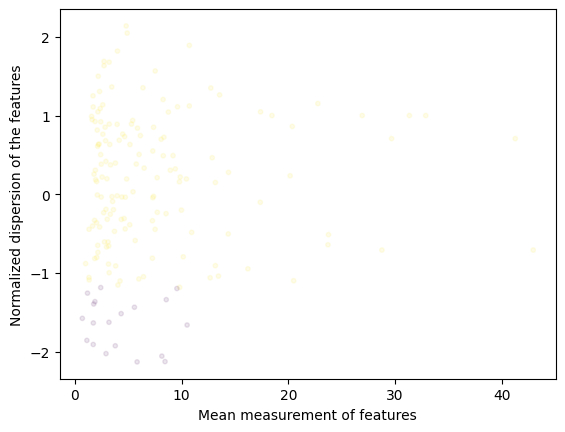

2023-04-25 03:25:46,284 cisTopic     INFO     Done!
2023-04-25 03:25:46,287 cisTopic     INFO     Calculating mean
2023-04-25 03:25:46,288 cisTopic     INFO     Calculating variance


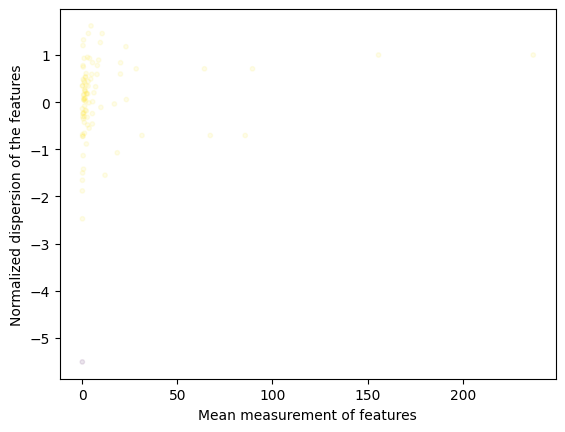

2023-04-25 03:25:46,422 cisTopic     INFO     Done!


In [23]:
from pycisTopic.diff_features import find_highly_variable_features
hvr = find_highly_variable_features(scplus_obj.to_df('ACC').loc[list(set(scplus_obj.uns['eRegulon_metadata']['Region']))], n_top_features=150, plot = True)
hvg = find_highly_variable_features(scplus_obj.to_df('EXP')[list(set(scplus_obj.uns['eRegulon_metadata']['Gene']))].T, n_top_features=90, plot = True)

In [29]:
#all
from scenicplus.networks import create_nx_tables, create_nx_graph, plot_networkx, export_to_cytoscape
nx_tables = create_nx_tables(
    scplus_obj = scplus_obj,
    eRegulon_metadata_key ='eRegulon_metadata_filtered',
    subset_eRegulons = ['evm.TU.Chr01.1121','evm.TU.Chr06.548','evm.TU.Chr04.439','evm.TU.Chr01.3544','evm.TU.Chr03.1438','evm.TU.ctg4075.3','evm.TU.Chr09.1746','evm.TU.Chr04.439','evm.TU.Chr03.2589','evm.TU.Chr02.2691','evm.TU.Chr11.149'],
    subset_regions = hvr,
    subset_genes = hvg,
    add_differential_gene_expression = True,
    add_differential_region_accessibility = True,
    differential_variable = ['lineage'])

... storing 'lineage' as categorical
... storing 'lineage' as categorical
... storing 'lineage' as categorical


In [30]:
G, pos, edge_tables, node_tables = create_nx_graph(nx_tables,
                   use_edge_tables = ['TF2R','R2G'],
                   color_edge_by = {'TF2R': {'variable' : 'TF', 'category_color' : {'evm.TU.Chr01.1121': 'sandybrown', 'evm.TU.Chr06.548': 'Purple','evm.TU.Chr04.439': 'darkred','evm.TU.Chr01.3544':'brown','evm.TU.Chr03.1438':'y','evm.TU.ctg4075.3':'y','evm.TU.Chr09.1746':'y','evm.TU.Chr04.439':'y','evm.TU.Chr03.2589':'y','evm.TU.Chr02.2691':'y','evm.TU.Chr11.149':'y'}},
                                    'R2G': {'variable' : 'R2G_rho', 'continuous_color' : 'viridis', 'v_min': -1, 'v_max': 1}},
                   transparency_edge_by =  {'R2G': {'variable' : 'R2G_importance', 'min_alpha': 0.1, 'v_min': 0}},
                   width_edge_by = {'R2G': {'variable' : 'R2G_importance', 'max_size' :  1.5, 'min_size' : 1}},
                   color_node_by = {'TF': {'variable': 'TF', 'category_color' : {'evm.TU.Chr01.1121': 'sandybrown', 'evm.TU.Chr06.548': 'Purple','evm.TU.Chr04.439': 'darkred','evm.TU.Chr01.3544':'brown','evm.TU.Chr03.1438':'y','evm.TU.ctg4075.3':'y','evm.TU.Chr09.1746':'y','evm.TU.Chr04.439':'y','evm.TU.Chr03.2589':'y','evm.TU.Chr02.2691':'y','evm.TU.Chr11.149':'y'}},
                                    'Gene': {'variable': {'lineage_Log2FC_Neuron'}, 'continuous_color' : 'bwr'},
                                    'Region': {'variable': {'lineage_Log2FC_Neuron'}, 'continuous_color' : 'viridis'}},
                   transparency_node_by =  {'Region': {'variable' : {'lineage_Log2FC_Neuron'}, 'min_alpha': 0.1},
                                    'Gene': {'variable' : {'lineage_Log2FC_Neuron'}, 'min_alpha': 0.1}},
                   size_node_by = {'TF': {'variable': 'fixed_size', 'fixed_size': 30},
                                    'Gene': {'variable': 'fixed_size', 'fixed_size': 15},
                                    'Region': {'variable': 'fixed_size', 'fixed_size': 10}},
                   shape_node_by = {'TF': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Gene': {'variable': 'fixed_shape', 'fixed_shape': 'ellipse'},
                                    'Region': {'variable': 'fixed_shape', 'fixed_shape': 'diamond'}},
                   label_size_by = {'TF': {'variable': 'fixed_label_size', 'fixed_label_size': 20.0},
                                    'Gene': {'variable': 'fixed_label_size', 'fixed_label_size': 10.0},
                                    'Region': {'variable': 'fixed_label_size', 'fixed_label_size': 0.0}},
                   layout='kamada_kawai_layout',
                   scale_position_by=250)

In [31]:
nx_tables['Node']['TF']

,Node_type,TF,lineage_Log2FC_Coelomocyte,lineage_Log2FC_Epithelial,lineage_Log2FC_Germ,lineage_Log2FC_Gut,lineage_Log2FC_Muscle,lineage_Log2FC_Neuron,lineage_Log2FC_Other
evm.TU.Chr04.439,TF,evm.TU.Chr04.439,1.087403,0.457679,0.655423,-3.564402,2.516791,0.294270,0.171019
evm.TU.Chr02.2691,TF,evm.TU.Chr02.2691,-2.702495,1.096653,4.384359,-3.795704,1.413331,-0.781902,0.972035
evm.TU.Chr01.1121,TF,evm.TU.Chr01.1121,-0.773938,-0.307981,0.201754,1.108683,-0.774113,0.413896,0.190877
evm.TU.Chr06.548,TF,evm.TU.Chr06.548,1.384932,-2.908180,2.837755,-4.544729,1.404710,-31.795433,0.042240
evm.TU.ctg4075.3,TF,evm.TU.ctg4075.3,0.489438,-1.158310,1.533699,-2.660937,1.537569,-0.229186,0.212606
evm.TU.Chr09.1746,TF,evm.TU.Chr09.1746,-2.401809,2.473752,-30.935457,-2.003020,4.902748,-2.269006,0.190140
evm.TU.Chr01.3544,TF,evm.TU.Chr01.3544,-4.698317,-30.373373,-3.774566,-2.531254,6.845464,-30.448408,-2.204708
evm.TU.Chr03.2589,TF,evm.TU.Chr03.2589,-0.002715,3.738219,-3.855141,-2.617846,4.546648,-0.528023,0.137504
evm.TU.Chr11.149,TF,evm.TU.Chr11.149,-1.104506,0.990323,-2.096380,0.767998,1.230840,0.373643,0.038611


In [32]:
import matplotlib.pyplot as plt

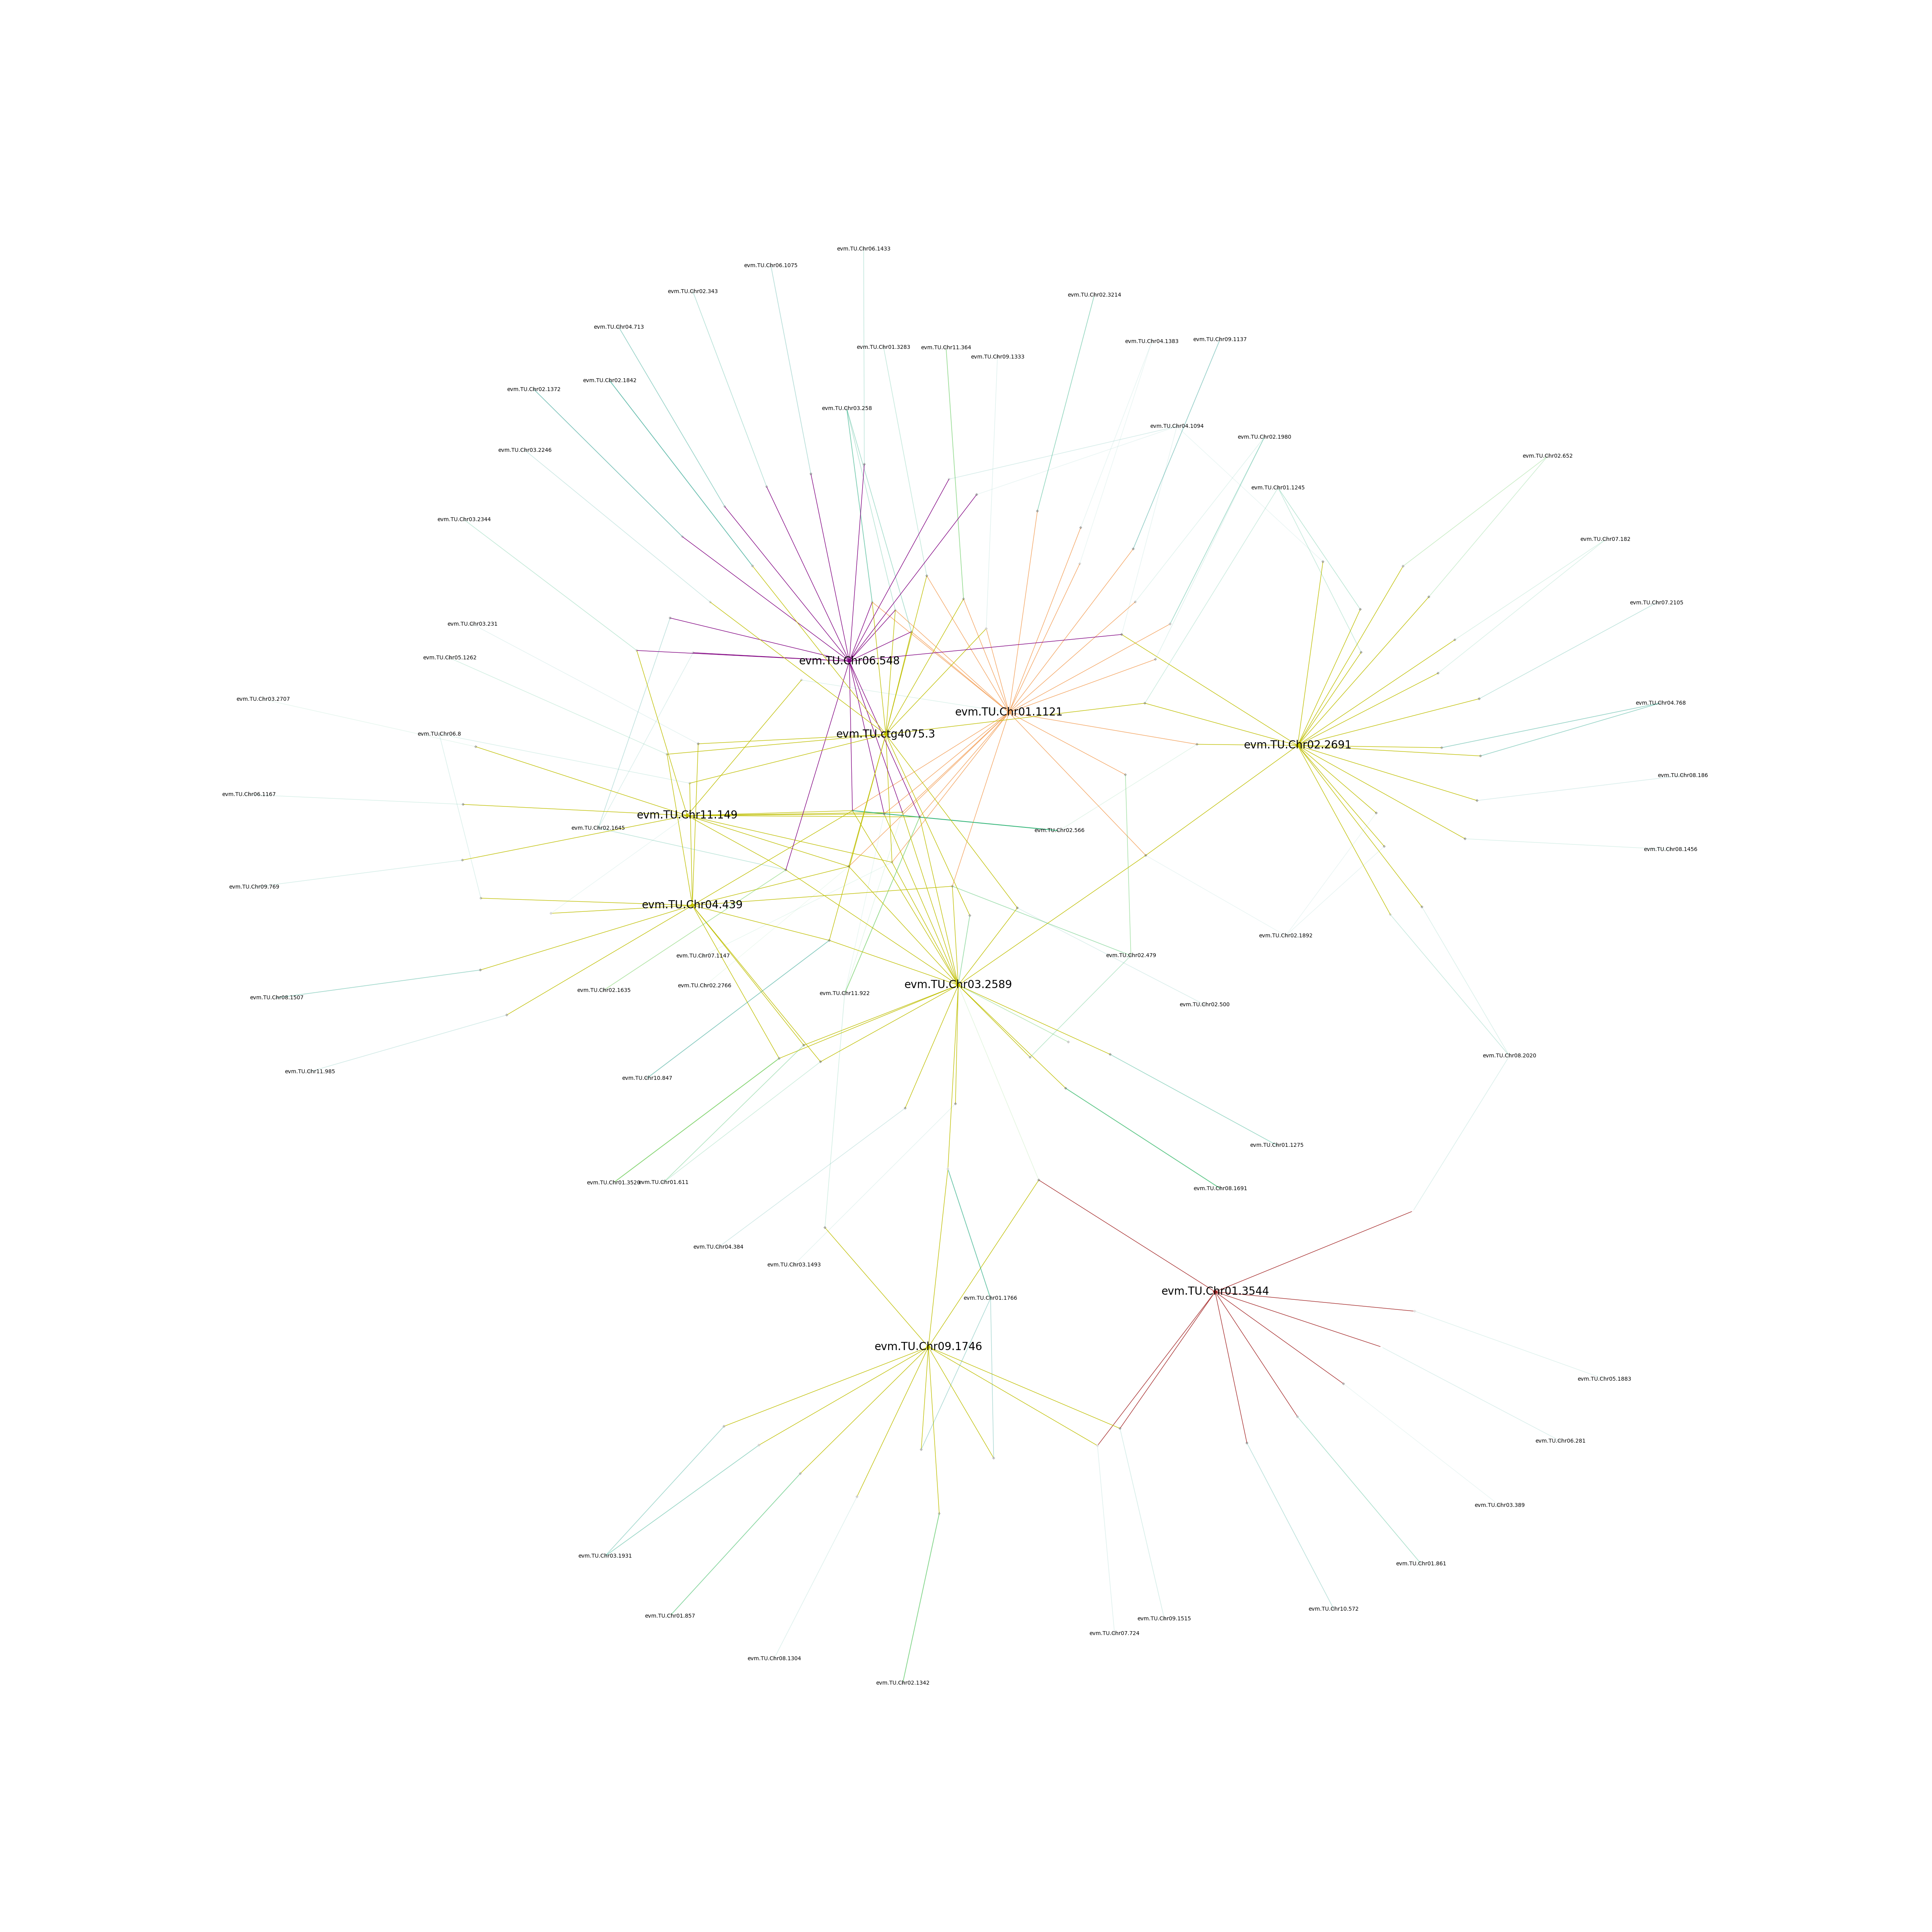

In [33]:
plt.figure(figsize=(50,50))
plot_networkx(G, pos)
plt.show()

In [34]:
export_to_cytoscape(G,pos,out_file='./network_ew_total.cyjs')